In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv("GE_india_2014_results.csv")
#data_2019=pd.read_csv("GE_india_2019_results.csv",encoding="latin1")

In [4]:
data.head()

,state/ut,PC,candidate_name,party,evm_votes,postal_votes,total_votes,Rank
0,Andhra Pradesh,Adilabad,GODAM NAGESH,Telangana Rashtra Samithi,425762,5085,430847,1
1,Andhra Pradesh,Adilabad,NARESH,Indian National Congress,257994,1563,259557,2
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,Telugu Desam,182879,1319,184198,3
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,Bahujan Samaj Party,94363,57,94420,4
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,Independent,41028,4,41032,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 8 columns):
state/ut          8355 non-null object
PC                8355 non-null object
candidate_name    8355 non-null object
party             8355 non-null object
evm_votes         8355 non-null int64
postal_votes      8355 non-null int64
total_votes       8355 non-null int64
Rank              8355 non-null int64
dtypes: int64(4), object(4)
memory usage: 522.3+ KB


In [6]:
States_2014_votes_registered=data.groupby(["state/ut"])["total_votes"].sum()
A=States_2014_votes_registered.tolist()


total_votes=pd.DataFrame(np.array(A),columns=["total_votes"])
state_ut=pd.DataFrame(np.array(States_2014_votes_registered.index),columns=["state_ut"])
States_2014_votes_registered=pd.concat([state_ut,total_votes],axis=1)
States_2014_votes_registered

,state_ut,total_votes
0,Andaman & Nicobar Islands,190328
1,Andhra Pradesh,48367188
2,Arunachal Pradesh,596956
3,Assam,15085883
4,Bihar,35885332
5,Chandigarh,453455
6,Dadra & Nagar Haveli,165286
7,Daman & Diu,87233
8,Delhi,8271766
9,Goa,817000


In [8]:
pop=pd.read_csv("populationindia.csv")
pop

,State name,Population
0,JAMMU AND KASHMIR,870354
1,JAMMU AND KASHMIR,753745
2,JAMMU AND KASHMIR,133487
3,JAMMU AND KASHMIR,140802
4,JAMMU AND KASHMIR,476835
...,...,...
587,PONDICHERRY,41816
588,PONDICHERRY,200222
589,ANDAMAN AND NICOBAR ISLANDS,36842
590,ANDAMAN AND NICOBAR ISLANDS,105597


In [9]:
pop=pop.groupby(["State name"]).Population.sum()
A=pop.tolist()
Population=pd.DataFrame(np.array(A),columns=["Population"])
State_name=pd.DataFrame(np.array(pop.index),columns=["State_name"])
pop=pd.concat([State_name,Population],axis=1)

In [10]:
POP_2014votes_reg=pd.concat([States_2014_votes_registered,pop],axis=1)
POP_2014votes_reg

,state_ut,total_votes,State_name,Population
0,Andaman & Nicobar Islands,190328,ANDAMAN AND NICOBAR ISLANDS,380581
1,Andhra Pradesh,48367188,ANDHRA PRADESH,84580777
2,Arunachal Pradesh,596956,ARUNACHAL PRADESH,1383727
3,Assam,15085883,ASSAM,31205576
4,Bihar,35885332,BIHAR,104099452
5,Chandigarh,453455,CHANDIGARH,1055450
6,Dadra & Nagar Haveli,165286,DADRA AND NAGAR HAVELI,343709
7,Daman & Diu,87233,DAMAN AND DIU,243247
8,Delhi,8271766,DELHI,16787941
9,Goa,817000,GOA,1458545


In [11]:
POP_2014votes_reg["Vote_percent"]=(POP_2014votes_reg["total_votes"]/POP_2014votes_reg["Population"])*100

#### Votes percent Contributed by each state in India for 2019 Elections


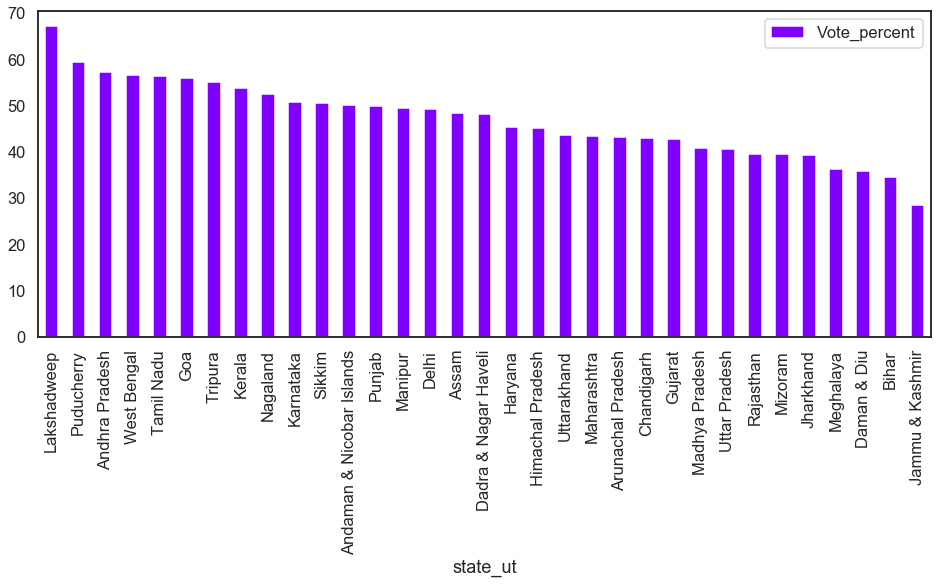

In [360]:
#POP_2014votes_reg.drop(["State_name"],axis=1,inplace=True)

POP_2014votes_reg=POP_2014votes_reg.sort_values(by="Vote_percent",ascending=False)

POP_2014votes_reg[["Vote_percent","state_ut"]].plot(kind="bar",x="state_ut",figsize =(16,6),cmap="rainbow")


#### Contribution of postal votes by State in 2014 elections

In [12]:
POP_2014votes_reg

,state_ut,total_votes,State_name,Population,Vote_percent
0,Andaman & Nicobar Islands,190328,ANDAMAN AND NICOBAR ISLANDS,380581,50.009853
1,Andhra Pradesh,48367188,ANDHRA PRADESH,84580777,57.184611
2,Arunachal Pradesh,596956,ARUNACHAL PRADESH,1383727,43.141169
3,Assam,15085883,ASSAM,31205576,48.343549
4,Bihar,35885332,BIHAR,104099452,34.472162
5,Chandigarh,453455,CHANDIGARH,1055450,42.963191
6,Dadra & Nagar Haveli,165286,DADRA AND NAGAR HAVELI,343709,48.088936
7,Daman & Diu,87233,DAMAN AND DIU,243247,35.861902
8,Delhi,8271766,DELHI,16787941,49.272070
9,Goa,817000,GOA,1458545,56.014727


In [13]:
#data.groupby(["state/ut"])["total_votes"].sum()
V = data.groupby(["state/ut"])["postal_votes"].sum()
V=pd.DataFrame(V,columns=["postal_votes"])
V=V.sort_values(by=["postal_votes"],ascending=False)
V=V.head(10)
V

,postal_votes
state/ut,
Andhra Pradesh,238710
Gujarat,123869
Rajasthan,82993
West Bengal,72018
Tamil Nadu,70747
Maharashtra,57725
Uttar Pradesh,56108
Kerala,32462
Madhya Pradesh,22148


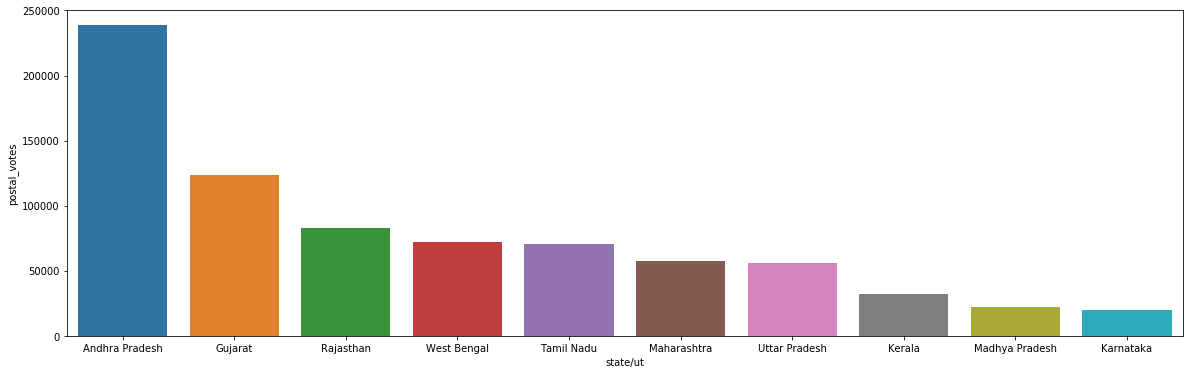

In [14]:
plt.figure(figsize=(20, 6))
sns.barplot(x=V.index, y="postal_votes",data=V);


In [20]:
V = data.groupby(["party"])["postal_votes"].sum()
V=pd.DataFrame(V,columns=["postal_votes"])
V=V.sort_values(by=["postal_votes"],ascending=False)
V=V.head(10)
V

,postal_votes
party,
Bharatiya Janata Party,284334
Indian National Congress,154806
Yuvajana Sramika Rythu Congress Party,76386
Telugu Desam,74861
Communist Party of India (Marxist),40456
Telangana Rashtra Samithi,35793
All India Trinamool Congress,30390
All India Anna Dravida Munnetra Kazhagam,24327
Dravida Munnetra Kazhagam,24323


##### Contribution of postal Top Parties by State in 2019 elections

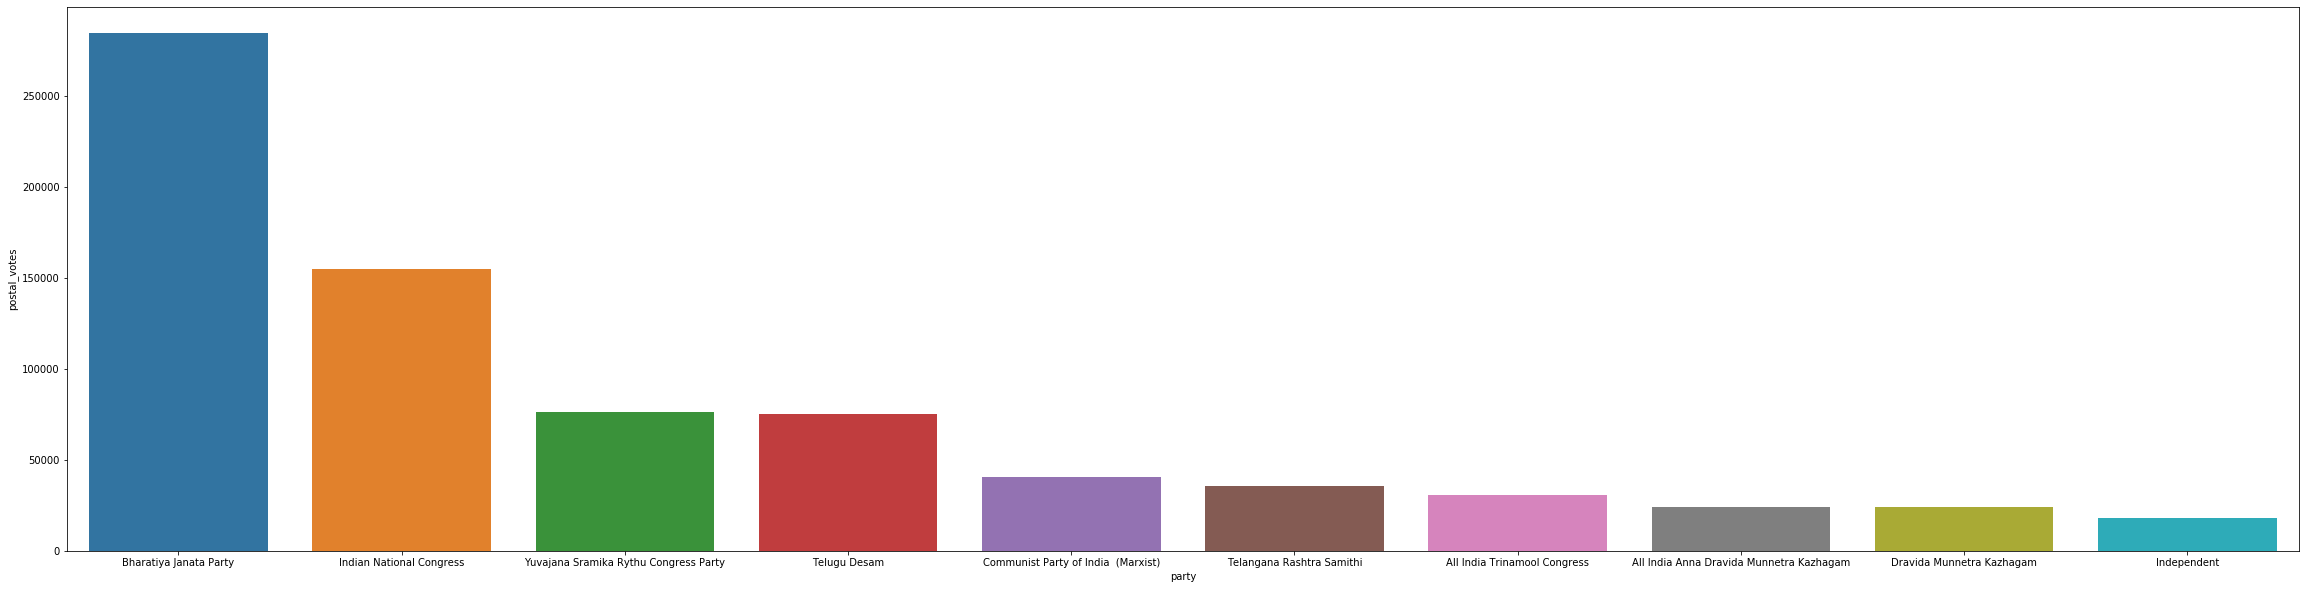

In [22]:
plt.figure(figsize=(40, 10))
sns.barplot(x=V.index, y="postal_votes",data=V);


In [27]:
V = data.groupby(["party"])["total_votes"].sum()
V=pd.DataFrame(V,columns=["total_votes"])
V=V.sort_values(by=["total_votes"],ascending=False)
V["Vote_percent"]=(V["total_votes"]/V["total_votes"].sum())*100
V=V.head(7)

#### Percentage of votes secured by each party

Text(0.5, 1.0, 'Percentage of votes secured by each party')

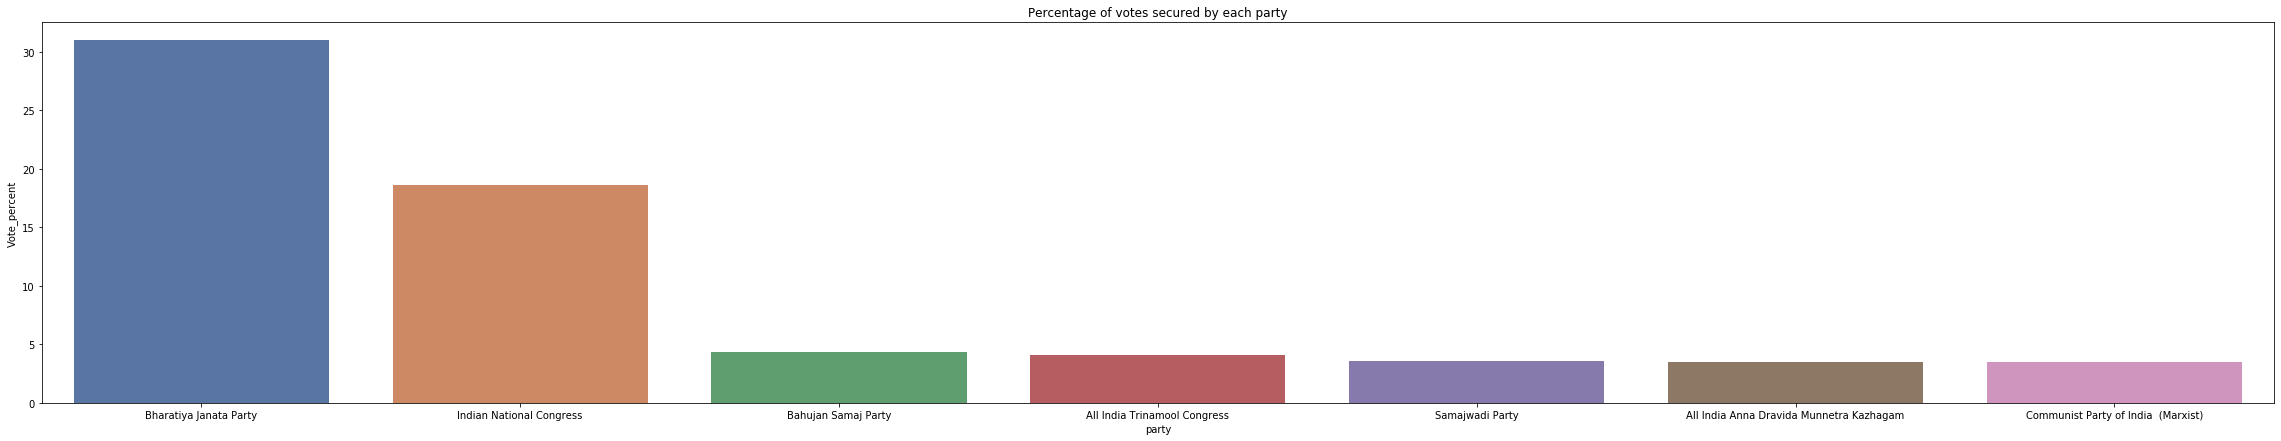

In [28]:
plt.figure(figsize=(40, 7))
sns.barplot(x=V.index, y="Vote_percent",data=V,palette="deep");
plt.title("Percentage of votes secured by each party")

##### Comparisons of Postal votes vs EVM votes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A86D7E0BE0>,
      dtype=object)

<Figure size 2880x720 with 0 Axes>

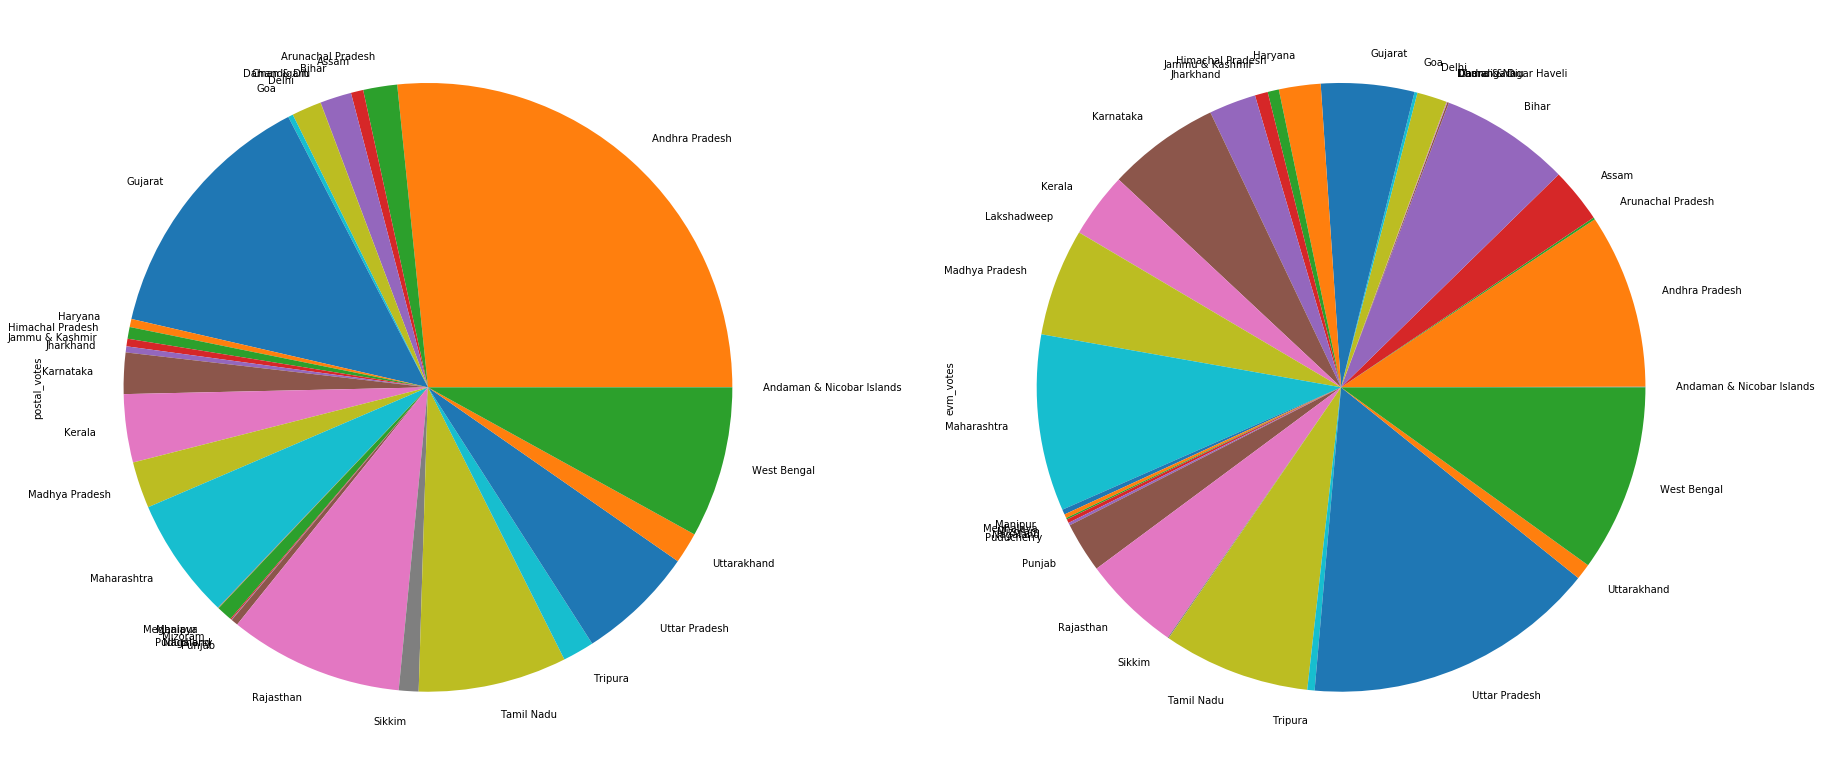

In [29]:
#df.groupby(['NFF', 'ABUSE']).size().unstack().plot(kind='bar', stacked=True)
#data.groupby(["state/ut"])["postal_votes","evm_votes"].sum().plot(kind='bar', stacked=True)
plt.figure(figsize=(40, 10))

data.groupby(["state/ut"])["postal_votes","evm_votes"].sum().plot(kind='pie',subplots=True,legend=False,figsize=(30,20))



In [30]:
total = data.groupby(['state/ut','PC'])['total_votes'].sum().to_frame()
#V1=total.sort_values(by = 'PC')
#V1=np.array(V1["total_votes"])
total

total_votes
state/ut                  PC                                    
Andaman & Nicobar Islands Andaman & Nicobar Islands       190328
Andhra Pradesh            Adilabad                       1045839
                          Amalapuram                     1120927
                          Anakapalli                     1148072
                          Anantapur                      1212145
...                                                          ...
West Bengal               Raiganj                        1108193
                          Ranaghat                       1353196
                          Srerampur                      1290433
                          Tamluk                         1337684
                          Uluberia                       1186027

[511 rows x 1 columns]

In [31]:
v=data.groupby(["state/ut","PC"])["total_votes"].max().to_frame()
v

total_votes
state/ut                  PC                                    
Andaman & Nicobar Islands Andaman & Nicobar Islands        90969
Andhra Pradesh            Adilabad                        430847
                          Amalapuram                      594547
                          Anakapalli                      568463
                          Anantapur                       610288
...                                                          ...
West Bengal               Raiganj                         317515
                          Ranaghat                        590451
                          Srerampur                       514933
                          Tamluk                          716928
                          Uluberia                        570785

[511 rows x 1 columns]

In [32]:
v["VOTES_PERCENT_WON_BYCAND"] = (v["total_votes"]/total["total_votes"])*100

v

total_votes  \
state/ut                  PC                                       
Andaman & Nicobar Islands Andaman & Nicobar Islands        90969   
Andhra Pradesh            Adilabad                        430847   
                          Amalapuram                      594547   
                          Anakapalli                      568463   
                          Anantapur                       610288   
...                                                          ...   
West Bengal               Raiganj                         317515   
                          Ranaghat                        590451   
                          Srerampur                       514933   
                          Tamluk                          716928   
                          Uluberia                        570785   

                                                     VOTES_PERCENT_WON_BYCAND  
state/ut                  PC                                                   
Andaman & Nicobar Islands Andaman & Nicobar Islands                 47.795910  
Andhra Pradesh            Adilabad                                  41.196303  
                          Amalapuram                                53.040653  
                          Anakapalli                                49.514577  
                          Anantapur                                 50.347772  
...                                                                       ...  
West Bengal               Raiganj                                   28.651598  
                          Ranaghat                                  43.633812  
                          Srerampur                                 39.903893  
                          Tamluk                                    53.594720  
                          Uluberia                                  48.125802  

[511 rows x 2 columns]

#### Highest and Least Perecentage Won by Candidates in Elections

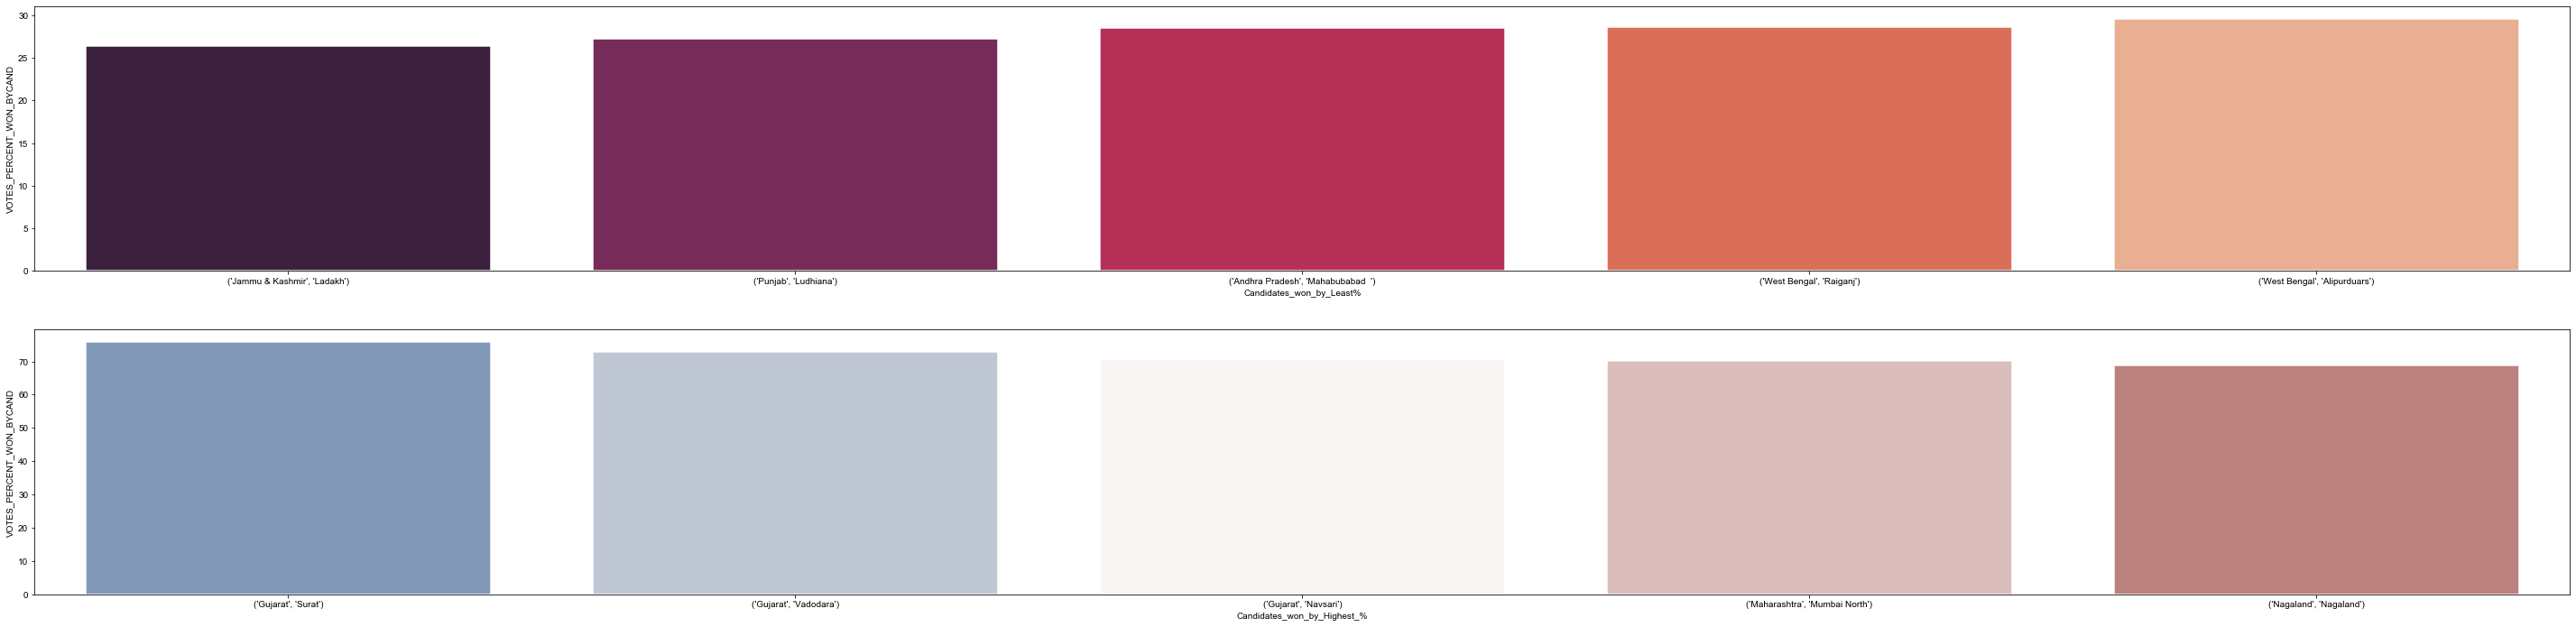

In [33]:
v1=v.sort_values(by="VOTES_PERCENT_WON_BYCAND",ascending=True).head()
v2=v.sort_values(by="VOTES_PERCENT_WON_BYCAND",ascending=False).head()
#plt.figure(figsize=(40, 10))

f,(ax1, ax2) = plt.subplots(2, 1, figsize=(40, 10))
sns.set(style="white", context="talk")

sns.barplot(x=v1.index, y="VOTES_PERCENT_WON_BYCAND",data=v1,palette="rocket",ax=ax1)
ax1.set_xlabel("Candidates_won_by_Least%")


sns.barplot(x=v2.index, y="VOTES_PERCENT_WON_BYCAND",data=v2,palette="vlag",ax=ax2)

ax2.set_xlabel("Candidates_won_by_Highest_%")

#sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

### STATE_ANALYSIS

In [423]:
data_TN=data[data["state/ut"]=="Tamil Nadu"]

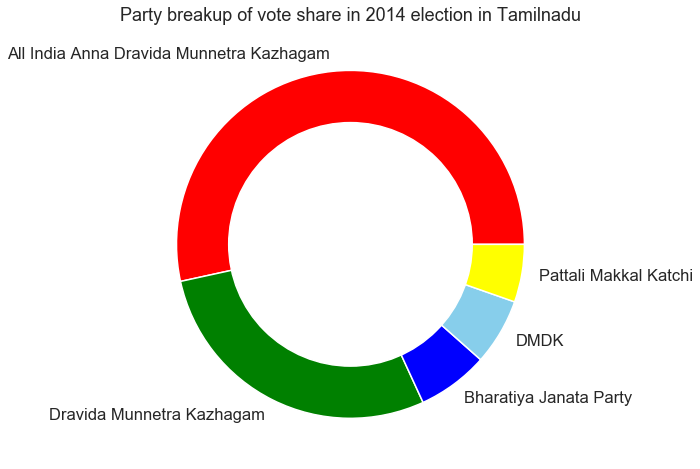

In [440]:
v = data_TN.groupby(["party"])["total_votes"].sum().to_frame()
v["total_votes"].sum()
v["VOTES_PERCENT"] = (v["total_votes"]/v["total_votes"].sum())*100
v=v.sort_values(by="VOTES_PERCENT",ascending=False).head(5)
plt.figure(figsize=(20, 8))

k=list(v.index)
k_VOTES_PERCENT=list(v["VOTES_PERCENT"])
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(k_VOTES_PERCENT, labels=k, colors=['red','green','blue','skyblue',"yellow"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Party breakup of vote share in 2014 election in Tamilnadu")
plt.show()



In [427]:
data_GUJ=data[data["state/ut"]=="Gujarat"]

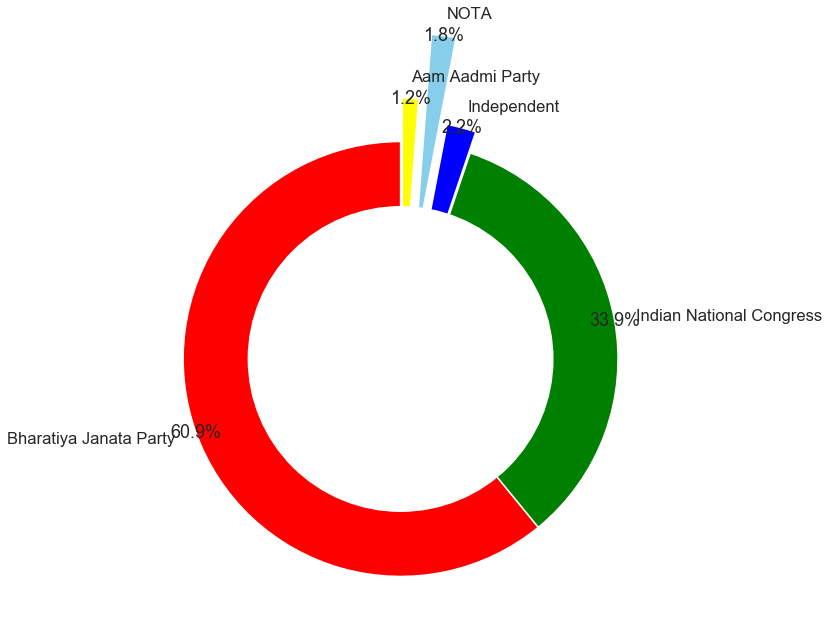

In [461]:
v = data_GUJ.groupby(["party"])["total_votes"].sum().to_frame()
v["total_votes"].sum()
v["VOTES_PERCENT"] = (v["total_votes"]/v["total_votes"].sum())*100
v=v.sort_values(by="VOTES_PERCENT",ascending=False).head(5)
plt.figure(figsize=(20, 10))


k=list(v.index)
k_VOTES_PERCENT=list(v["VOTES_PERCENT"])
my_circle=plt.Circle( (0,0), 0.7, color='white')
explode = (0,0,0.1,0.5,0.2)

plt.pie(k_VOTES_PERCENT, labels=k, colors=['red','green','blue','skyblue',"yellow"],autopct='%1.1f%%', startangle=90, pctdistance=1,explode=explode)
p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.title("Party breakup of vote share in 2014 election in Gujarat")
plt.show()